In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## A
Purpose: Numerically estimate the diffusion equation

Governing PDE: $\frac{dT}{dt} = \mu \frac{d^2T}{dx^2}$


Numerical estimate: $T^{n+1}_{j} = \underbrace{\frac{\mu \Delta t}{\Delta x^2}(T^{n}_{j+1} +  T^{n}_{j-1} - 2T^{n}_{j})}_{\text{new value used to update based on surroundings}} + \underbrace{T^{n}_{j}}_{\text{old value}}$

Boundarys: (0, 500)

---

## B
Purpose: Implement the numerical scheme with code. Plot the temperature along the slab length.

Note that the far end fully reaches 500 degrees, that is a key difference between finite vol and element.

In [41]:
# Initialize variables
mu = 0.1 # ft^2/hr
x_total = 1 # ft
time_total = 3 # hr
dx = 0.05
dt = 0.0125
n = int(time_total/dt)
m = int(x_total/dx)
T = np.zeros([n,m]) # Define temperature array
print(T.shape)
T[0,0] = 0
T[0,-1] = 500
l2_error = np.zeros([n-1, m]) # Define error array
constant = (mu * dt) / (dx**2) # Some people put a 1/2 here be careful
# Loop through a time point
for i in range(0,n-1):
    # Loop through spacial discretizations
    for j in range(0,m):
        if j==0:
            T[i+1,j]=0
        elif j==(m-1):
            T[i+1,j]=500
        else:
            T[i+1,j] = constant * (T[i,j+1] + T[i,j-1] - 2*T[i,j]) + T[i,j]
        l2_error[i,j] = T[i+1,j] - T[i,j]
l2_error1 = ((l2_error**2).sum(axis=1))**(1/2) / (m-2)
l2_error2 = ((l2_error**2).sum(axis=1)/ (m-2))**(1/2) 
FE_simulation = T

(240, 20)


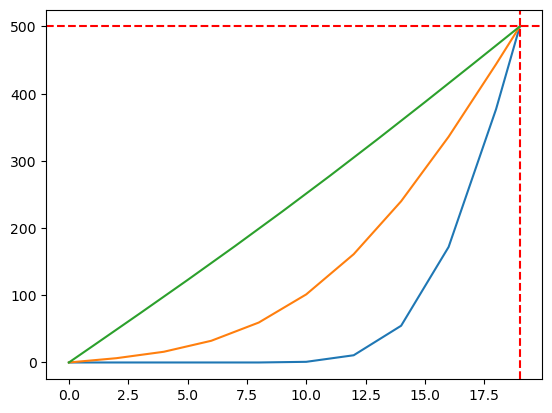

In [21]:
plt.plot(T[10,:])
plt.plot(T[50,:])
plt.plot(T[-1,:])
plt.axhline(500, c='red', linestyle='dashed')
plt.axvline(19, c='red', linestyle='dashed')
#plt.xticks([0,10,20], labels=dx*np.array([0,10,20]))
plt.show()

## C
Purpose: To see that error continues to go down throughout the simulation and the solution never fully stabilizes. The RMSE is computed oddly in the handout with the mean being outside of the error and root term.

Fraley handout: $E_{rms}=\frac{1}{N-2}\sqrt{\sum^{N-1}_{i=2}(\Delta T_i)}$

Typically seen: $E_{rms}=\sqrt{\frac{1}{N-2}\sum^{N-1}_{i=2}(\Delta T_i)}$

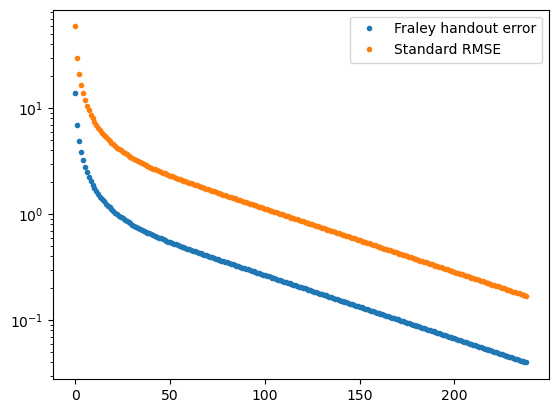

In [22]:
plt.plot(l2_error1, marker='.', linewidth=0, label='Fraley handout error')
plt.plot(l2_error2, marker='.', linewidth=0, label='Standard RMSE')
plt.legend()
plt.yscale("log")

## D/E
Purpose: Make the finite volume differencing scheme and remember the boundary conditions are critical components of this compared to finite element.

Numerical estimate: $T^{n+1}_{j} = \underbrace{\frac{\mu \Delta t}{\Delta x^2}(T^{n}_{j+1} +  T^{n}_{j-1} - 2T^{n}_{j})}_{\text{new value used to update based on surroundings}} + \underbrace{T^{n}_{j}}_{\text{old value}}$

Boundarys:
* $T^{n+1}_{1}=2T_{\text{left boundary}} - T^{n+1}_{2}$
* $T^{n+1}_{j+1}=2T_{\text{right boundary}} - T^{n+1}_{j}$

## F

In [46]:
# Initialize variables
mu = 0.1
x_total = 1
time_total = 3
dx = 0.05
dt = 0.0125
n = int(time_total/dt)
m = int(x_total/dx)-1
T = np.zeros([n,m+2])
print(T.shape)
l2_error_FV = np.zeros([n, m+1])
T[0,m+1] = 500*2 - 0 
constant = (mu * dt) / (dx**2)
# Loop through a time point
for i in range(0,n-1):
    # Loop through spacial discretizations
    for j in range(1,m+1):
        T[i+1,j] = constant * (T[i,j+1] + T[i,j-1] - 2*T[i,j]) + T[i,j]
        l2_error_FV[i,j] = T[i+1,j] - T[i,j]
    # Lag the boundary update by using the previous time value to evaluate new boundary
    T[i+1,0] = -T[i+1,1] # -T[i+1,1]
    T[i+1,m+1] = 1000 - T[i+1,m] # 1000 - T[i+1,m-1]
l2_error_FV = ((l2_error_FV[0:-1]**2).sum(axis=1))**(1/2) / (m-1)

(240, 21)


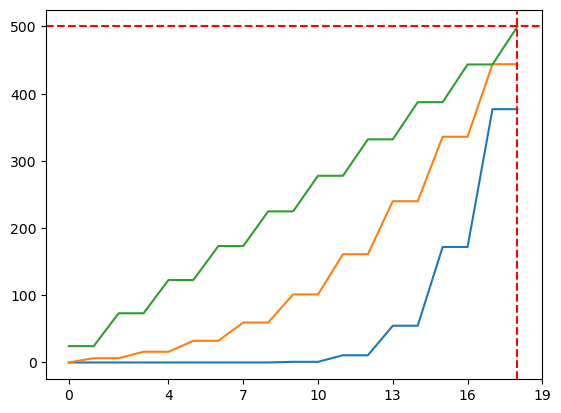

In [47]:
plt.plot(T[10,1:-1])
plt.plot(T[50,1:-1])
plt.plot(T[-1,1:-1])
plt.axhline(500, c='red', linestyle='dashed')
plt.axvline(18, c='red', linestyle='dashed')
ticks = np.array([0,4,7,10,13, 16,19])
plt.xticks(ticks)
plt.show()

Another interesting note is that some students decided to take the finite volume and compute the values at the faces by taking averages between points again. I'm not sure why, but doing so should produce a result that looks very similar, if not exactly the same as the finite element version above.

So look out for that.

In [48]:
face_values_FV = np.zeros((T.shape[0], T.shape[1]-1))
face_values_error = np.zeros([n, T.shape[1]-1]) # Define error array
for i in range(T.shape[0]):
    for j in range(face_values_FV.shape[1]):
        face_values_FV[i,j] = (T[i,j] + T[i,j+1])/2
        if i > 0:
            face_values_error[i-1,j] = face_values_FV[i,j] - face_values_FV[i-1,j]
l2_error_FV_into_FE = ((face_values_error[0:-1]**2).sum(axis=1))**(1/2) / 18

In [51]:
face_values_FV-FE_simulation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

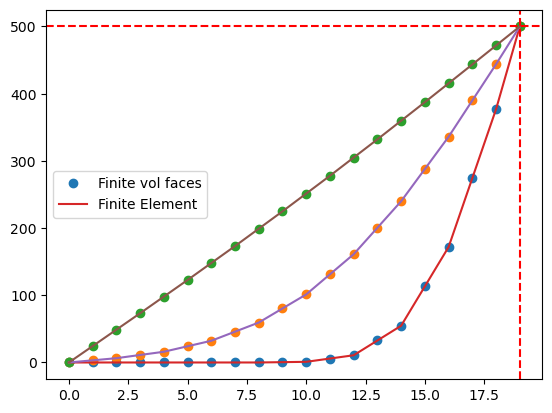

In [52]:
plt.plot(face_values_FV[10,:], label='Finite vol faces', marker='o', linewidth=0)
plt.plot(face_values_FV[50,:], marker='o', linewidth=0)
plt.plot(face_values_FV[-1,:], marker='o', linewidth=0)

plt.plot(FE_simulation[10,:], label='Finite Element')
plt.plot(FE_simulation[50,:])
plt.plot(FE_simulation[-1,:])

plt.axhline(500, c='red', linestyle='dashed')
plt.axvline(19, c='red', linestyle='dashed')
ticks = np.array([1,4,7,10,13, 16,19,21])
plt.legend()
#plt.xticks(ticks-1, labels=ticks)
plt.show()

## G
Purpose: Some qualitative observations about the graphs. 

Note that the finite volume formulation has jagged steps, but these go away if you increase spatial resolution of the simulation or decrease the diffusivity slightly and are partially an artifact.

In [53]:
# Initialize variables
mu = 0.1
x_total = 1
time_total = 3
dx = 0.05
dt = 0.01 # Smaller time step
n = int(time_total/dt)
m = int(x_total/dx)-1
T = np.zeros([n,m+2])
print(T.shape)
l2_error_FV_2 = np.zeros([n, m+1])
T[0,m+1] = 500*2 - 0 
constant = (mu * dt) / (dx**2)
# Loop through a time point
for i in range(0,n-1):
    # Loop through spacial discretizations
    for j in range(1,m+1):
        T[i+1,j] = constant * (T[i,j+1] + T[i,j-1] - 2*T[i,j]) + T[i,j]
        l2_error_FV_2[i,j] = T[i+1,j] - T[i,j]
    # Lag the boundary update by using the previous time value to evaluate new boundary
    T[i+1,0] = -T[i+1,1] # -T[i+1,1]
    T[i+1,m+1] = 1000 - T[i+1,m] # 1000 - T[i+1,m-1]
l2_error_FV_2 = ((l2_error_FV_2[0:-1]**2).sum(axis=1))**(1/2) / (m-1)

(300, 21)


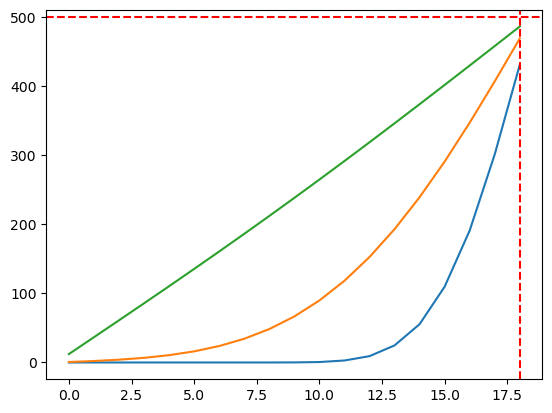

In [54]:
plt.plot(T[10,1:-1])
plt.plot(T[50,1:-1])
plt.plot(T[-1,1:-1])
plt.axhline(500, c='red', linestyle='dashed')
plt.axvline(18, c='red', linestyle='dashed')
#ticks = np.array([0,4,7,10,13, 16,19])
#plt.xticks(ticks)
plt.show()

## H
Purpose: See how the errors differ. Note that students that calculated face values from the volume will produce the exact same error curves as the finite element. You need to look at their code implementation to see what is going on.

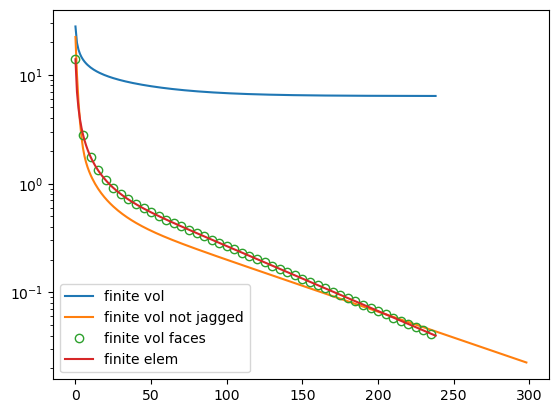

In [55]:
plt.plot(l2_error_FV, label='finite vol')
plt.plot(l2_error_FV_2, label='finite vol reduced time step')
plt.plot([i for i in range(0,len(l2_error_FV_into_FE),5)], l2_error_FV_into_FE[::5], label='finite vol faces', marker='o', linewidth=0, fillstyle='none')
plt.plot(l2_error1, label='finite elem')
plt.legend()
plt.yscale('log')